In [2]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import numpy as np
CSV = './all_stock_price/public/2330.TW.csv'

daily_trade =pd.read_csv('{}'.format(CSV))
daily_trade = daily_trade.to_dict()

Dic_Open = {}
Dic_High = {}
Dic_Low = {}
Dic_Close = {}
Dic_Volume = {}


for count in range(len(daily_trade['Date'])):
    Dic_Open[daily_trade['Date'][count]] = daily_trade['Open'][count]
    Dic_High[daily_trade['Date'][count]] = daily_trade['High'][count]
    Dic_Low[daily_trade['Date'][count]] = daily_trade['Low'][count]
    Dic_Close[daily_trade['Date'][count]] = daily_trade['Close'][count]
    Dic_Volume[daily_trade['Date'][count]] = daily_trade['Volume'][count]

In [3]:
# from dict ----> dataframe -----> plot
def simple_plot_function(fun = {'a':1.0},name = 'name',astype = 'float64'):
    name = str(name)
    if not type(fun)== dict:
        print('type error')

    else:    
        df  = pd.Series( fun,fun.keys(),name=name ).to_frame()
        df[name] = df[name].astype(astype)
    return df[name].plot(kind = 'line')

In [4]:
L = [l for l in Dic_Close.values()]
D = [d for d in daily_trade['Date'].values()]

# 均線(移動平均)

In [5]:
# 均線(移動平均)
def Moving_Average(interval = 5):
    L = [l for l in Dic_Close.values()]
    Dic_MA = {}
    interval  =int(interval)
    for i in range(len(L)):
        if i-interval <0:
            pass
        else:
            Dic_MA[D[i]]="{:.2f}".format(sum(L[i-interval:i])/interval)
    return Dic_MA
# 向上開花
def All_Average():
    Result = []
    All_Moving_Average = {}
    for date in Moving_Average(60):
        All_Moving_Average[date] = [Moving_Average(5)[date],Moving_Average(10)[date],Moving_Average(20)[date],Moving_Average(60)[date]]

    for date in All_Moving_Average.keys():
        M5 = All_Moving_Average[date][0]
        M10 = All_Moving_Average[date][1]
        M20 = All_Moving_Average[date][2]
        M60 = All_Moving_Average[date][3]
        if M5 >= max(All_Moving_Average[date]) and M60 <= min(All_Moving_Average[date]) and M10 >= M20:
            Result.append(date)
    return Result
#Moving_Average(interval = 5)

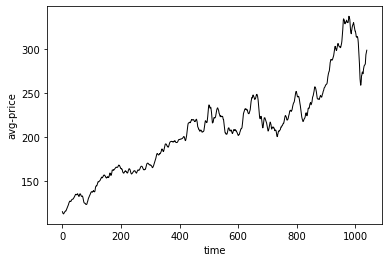

<Figure size 864x216 with 0 Axes>

In [6]:
# DEMO

Dic = Moving_Average(interval = 5)
List = [float(d) for d in Dic.values()]

plt.ylabel('avg-price')
plt.xlabel('time')
plt.plot(List,linewidth=1, color='black')

plt.figure(figsize=(12,3))
plt.show()

In [7]:
# Bias
def Bias(days = 3,date = '2020-02-19'):
    try:
        x = Dic_Close[date]
        y = float( Moving_Average( interval = days )[date] )
        Result = (x-y)/y
    except KeyError as f:
        Result = 100.0
    return Result

In [12]:
# Bias Demo
Bias_Dic = {}
for date in Dic_Close.keys(): 
        Bias_Dic[date] = Bias(days = 3,date = date)
        
# Bias in (0,0.1)
result = []
for date in Bias_Dic.keys():
    if 0 <= Bias_Dic[date] < 0.1:
        result.append(date)
print(result[:5])

['2016-01-13', '2016-01-15', '2016-01-18', '2016-01-19', '2016-01-22']


# 指數移動平均  12days 26days

In [13]:
def EMA(day = 12):

    Result_List = []
    Result_Dic = {}
    day  =int(day)
    for i in range(len(L)):
        denominator_EMA = 0
        fraction_EMA = 0
        if i-day < 0:
            Result_List.append('NaN')
        else:
            interval_price = L[i - day:i]
            alpha = ((2/(day+1)))
            for c in range(day):
                denominator_EMA += (1-alpha)**c
                fraction_EMA += ((1-alpha)**c)*float(interval_price[c])
            Result_List.append (fraction_EMA / denominator_EMA )
            Result_Dic = dict(zip(D,Result_List))
    return Result_Dic

In [14]:
# 12天指數移動平均
A = EMA(day = 12)
# 26天指數移動平均
B = EMA(day = 26)
# 9天指數移動平均
C = EMA(day = 9)

# 繪圖

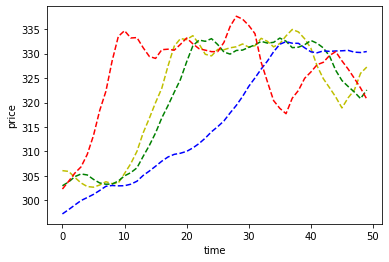

<Figure size 864x216 with 0 Axes>

In [15]:
EMA_9 = [e for e in C.values()]
EMA_12 = [e for e in A.values()]
EMA_26 = [e for e in B.values()]


plt.ylabel('price')
plt.xlabel('time')
plt.plot(EMA_9[950:1000],'y--')
plt.plot(EMA_12[950:1000],'g--')
plt.plot(EMA_26[950:1000],'b--')
plt.plot(List[950:1000],'r--')
plt.figure(figsize=(12,3))
plt.show()

# MACD

In [16]:
def DIF(day1 = 12,day2 = 26):
    day1 = int(day1)
    day2 = int(day2) 
    Result_List = []
    EMA_1 = [e for e in EMA(day = day1).values()]
    EMA_2 = [e for e in EMA(day = day2).values()]
    for c in range(len(EMA_1)):
        try:
            Result_List.append(EMA_1[c] - EMA_2[c])
        except TypeError as e:
            Result_List.append('NaN')
        Result_Dic = dict(zip(D,Result_List))


            
    return Result_Dic

In [20]:
# DEMO of DIF


#DIF(day1 = 12,day2 = 26)

In [21]:
def MACD(day = 9):
    mL = [l for l in DIF(day1 = 12,day2 = 26).values()]
    mResult_List = []
    mResult_Dic = {}
    day  =int(day)
    for i in range(len(L)):
        denominator_EMA = 0
        fraction_EMA = 0
        if i-day < 0:
            mResult_List.append('NaN')

        else:
            interval_price = mL[i - day:i]
            alpha = ((2/(day+1)))
            for c in range(day):
                denominator_EMA += (1-alpha)**c
                fraction_EMA += ((1-alpha)**c)*float(interval_price[c])
            mResult_List.append (fraction_EMA / denominator_EMA )
            mResult_Dic = dict(zip(D,mResult_List))
    return mResult_Dic   

In [22]:
# DEMO of DIF


#MACD(day = 9)

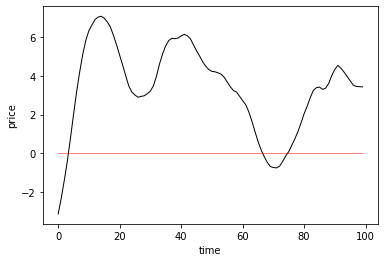

<Figure size 864x216 with 0 Axes>

In [23]:
MACD_List = [x for x in MACD(day = 9).values()]
X = [0 for x in MACD(day = 9).values()]

plt.ylabel('price')
plt.xlabel('time')
plt.plot(MACD_List[100:200],linewidth=1, color='black')
plt.plot(X[100:200], linewidth=0.5, color='red')
plt.figure(figsize=(12,3))
plt.show()

# RSV

# 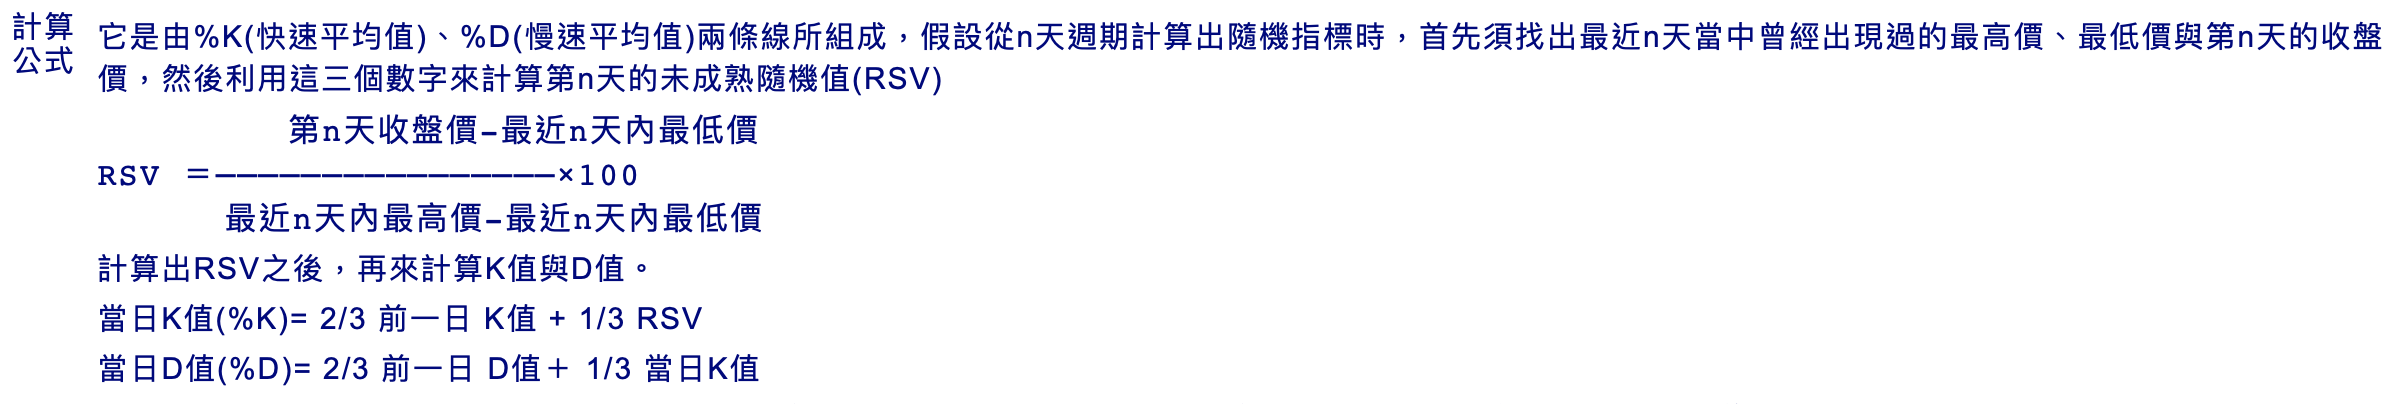

In [24]:
daily_trade =pd.read_csv('{}'.format(CSV))
daily_trade = daily_trade.to_dict()

Dic_Open = {}
Dic_High = {}
Dic_Low = {}
Dic_Close = {}

for count in range(len(daily_trade['Date'])):
    Dic_Open[daily_trade['Date'][count]] = daily_trade['Open'][count]
    Dic_High[daily_trade['Date'][count]] = daily_trade['High'][count]
    Dic_Low[daily_trade['Date'][count]] = daily_trade['Low'][count]
    Dic_Close[daily_trade['Date'][count]] = daily_trade['Close'][count]

In [25]:
# for d in Dic_Close.keys():
#     print([d,Dic_Open[d],Dic_High[d],Dic_Low[d],Dic_Close[d]])

In [26]:
def RSV(n = 9):
    Close_List = [l for l in Dic_Close.values()]
    High_List = [h for h in Dic_High.values()]
    Low_list = [low for low in Dic_Low.values()]
    D = [d for d in Dic_Close.keys()]
    day = int(n)
    Result_List = []
    for i in range(len(Close_List)):
        denominator_RSV = 0
        fraction_RSV = 0
        min_price = 0.0
        Max_price = 0.0
        Result = 0.0
        if i-day < 0:
            Result_List.append('NaN')
        else:
            interval_close_price = Close_List[i - day:i]
            interval_high_price = High_List[i - day:i]
            interval_low_price = Low_list[i - day:i]            
            min_price = min(interval_low_price)
            Max_price = max(interval_high_price)
            
            denominator_RSV = Max_price - min_price
            fraction_RSV = Close_List[i] - min_price
            Result = fraction_RSV / denominator_RSV
            Result_List.append(Result)
    Result_dict = dict(zip(D,Result_List))
    return Result_dict            

In [30]:
#RSV(n = 9)

#  Bonus: Dict to Dataframe 

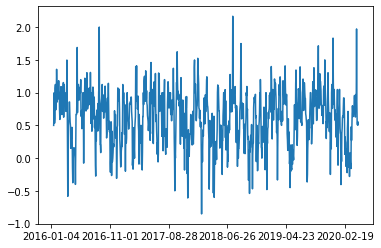

In [31]:
simple_plot_function(fun = RSV(n = 9),name = "RSV",astype = 'float64')

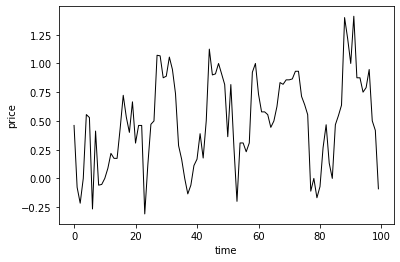

<Figure size 864x216 with 0 Axes>

In [32]:
RSV_List = [x for x in RSV(n = 9).values()]
plt.ylabel('price')
plt.xlabel('time')
plt.plot(RSV_List[200:300],linewidth=1, color='black')

plt.figure(figsize=(12,3))
plt.show()

# KD

# 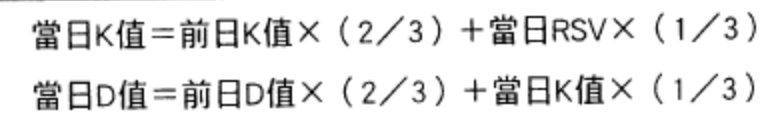

In [33]:
def K_values(dic = RSV()):
    Days = [d for d in dic.keys()][9:]
    Null_list = ['NaN' for i in range(9)]
    K_value = 0.0
    K_list = []
    for day in Days:
        K_value = (K_value)*(2/3)+ (dic[day])*(1/3)
        K_list.append(K_value)
    K_list = ['NaN' for i in range(9)] + K_list
    Result_Dic = dict(zip([d for d in dic.keys()],K_list))
    return Result_Dic

In [34]:
# K_values(dic = RSV())

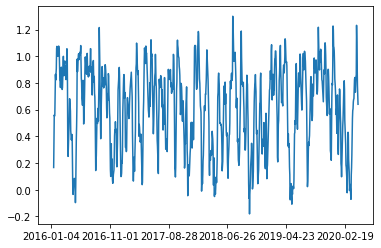

In [35]:
simple_plot_function(fun = K_values(dic = RSV()),name = "K_values",astype = 'float64')

In [36]:
def D_values():
    Result_Dic = K_values(dic = K_values())
    return Result_Dic

In [37]:
# D_values()

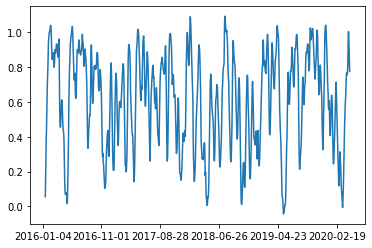

In [38]:
simple_plot_function(fun = D_values(),name = "D_values",astype = 'float64')

# KD 線

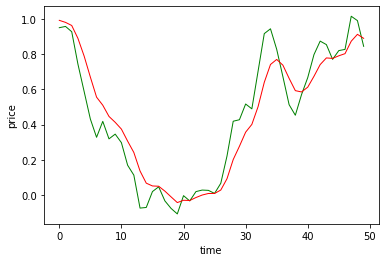

<Figure size 864x216 with 0 Axes>

In [39]:
K_List = [x for x in K_values().values()]
D_List = [x for x in D_values().values()]
plt.ylabel('price')
plt.xlabel('time')
plt.plot(K_List[800:850],linewidth=1, color='green')
plt.plot(D_List[800:850],linewidth=1, color='red')
plt.figure(figsize=(12,3))
plt.show()